Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import wrangle

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
train, validate, test = wrangle.split(df)

In [4]:
train.shape, validate.shape, test.shape

((1595690, 7), (683868, 7), (569890, 7))

In [5]:
train.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'tax_assessed_value',
       'year_built', 'tax_amount', 'fips_code'],
      dtype='object')

##### MinMaxScaler()

Text(0.5, 1.0, 'Scaled')

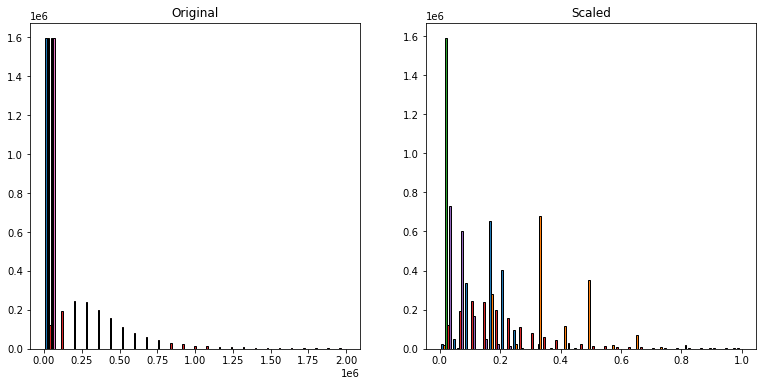

In [8]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
cols_to_scale = ['bedrooms','bathrooms','square_feet']
scaler.fit(train[cols_to_scale])

train_scaled = scaler.transform(train[cols_to_scale])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')



##### StandardScaler()

Text(0.5, 1.0, 'Scaled')

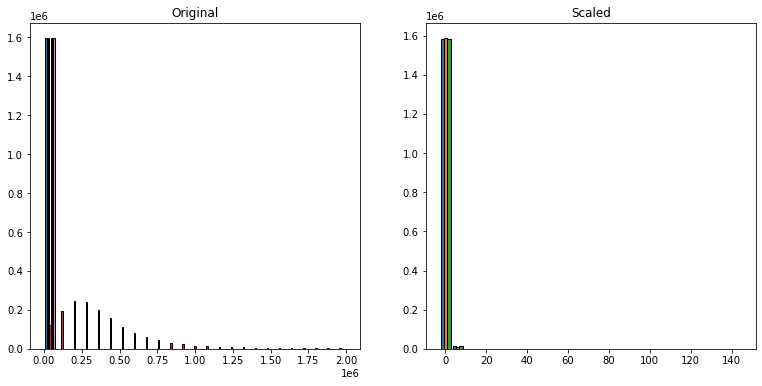

In [23]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
cols_to_scale = ['bedrooms','bathrooms','square_feet']
scaler.fit(train[cols_to_scale])

train_scaled = scaler.transform(train[cols_to_scale])


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

##### RobustScaler()

Text(0.5, 1.0, 'Scaled')

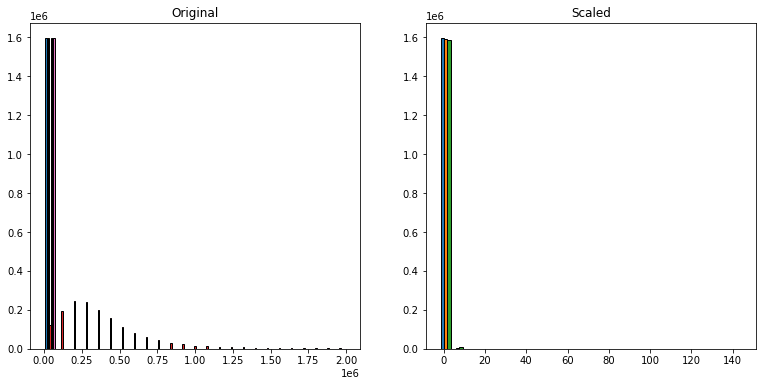

In [15]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
cols_to_scale = ['bedrooms','bathrooms','square_feet']
scaler.fit(train[cols_to_scale])

train_scaled = scaler.transform(train[cols_to_scale])



plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

#### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

##### MinMaxScaler()

Text(0.5, 1.0, 'Scaled - Inverse')

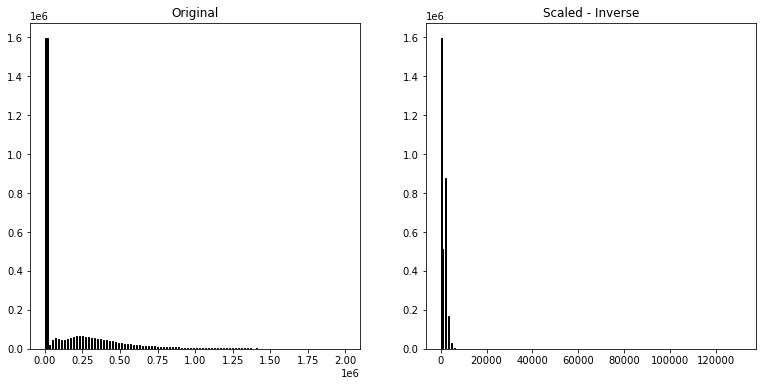

In [25]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
cols_to_scale = ['bedrooms','bathrooms','square_feet']
scaler.fit(train[cols_to_scale])
train_scaled = scaler.transform(train[cols_to_scale])
train_scaled_inverse = scaler.inverse_transform(train_scaled)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=100, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled_inverse, bins=100, ec='black')
plt.title('Scaled - Inverse')


The scaled data distribution looks a lot similar to the original, non-scaled dataset.

#### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

Text(0.5, 1.0, 'Scaled')

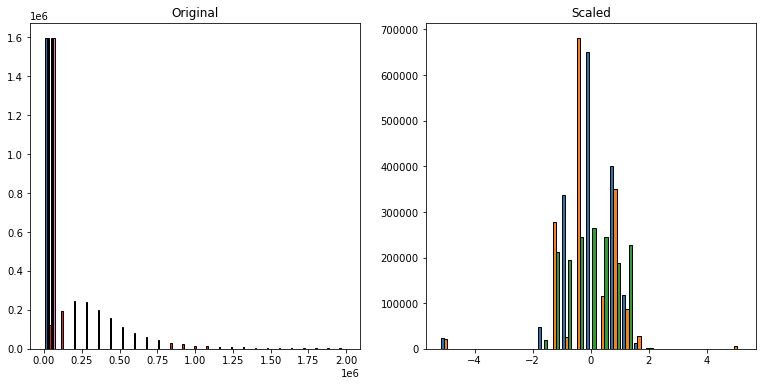

In [26]:
qt = sklearn.preprocessing.QuantileTransformer(n_quantiles=10, output_distribution='normal', random_state=0)
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
cols_to_scale = ['bedrooms','bathrooms','square_feet']
train_scaled = qt.fit_transform(train[cols_to_scale])


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

#### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Text(0.5, 1.0, 'Scaled')

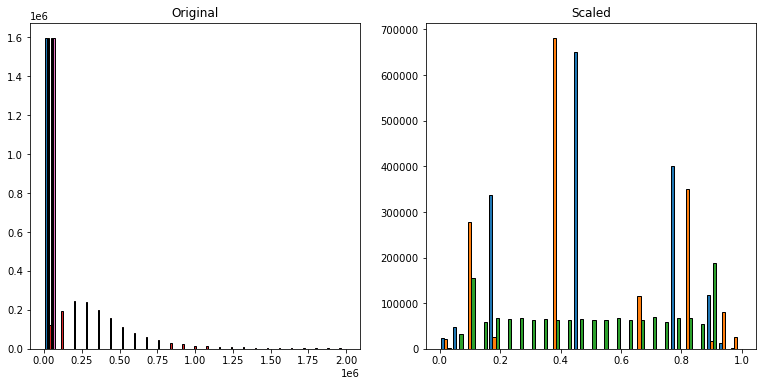

In [27]:
# Default output_distribution = 'uniform'

qt = sklearn.preprocessing.QuantileTransformer(n_quantiles=10, random_state=0)
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
cols_to_scale = ['bedrooms','bathrooms','square_feet']
train_scaled = qt.fit_transform(train[cols_to_scale])


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

#### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [ ]:
def scaling(train, validate, test):
    